In [1]:
!pip3 install tensorflow==2.7.0

import tensorflow as tf
from tensorflow import keras

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

from sklearn.model_selection import train_test_split

#set random
np_state = np.random.RandomState(2019)

2022-02-03 21:13:35.494460: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-02-03 21:13:35.494481: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
filename = 'mini_mnist.csv'

In [3]:
def bar_custom(current, total, width=100):
    print("Downloading: %d%% [%d / %d] bytes" % (current / total * 100, current, total))

#Don't think too much about the getDataset method. It is used for convenience
def getDataset(filename, **kwargs):
    url = f'https://github.com/IvanReznikov/mdx-msc-data-science/raw/main/datasets/{filename}'
    try:
        import os
        if filename not in os.listdir():
            !pip3 install wget
            import wget
            downloaded_filename = wget.download(url)
            print(f'{downloaded_filename} file downloaded', bar=bar_custom)
        else:
            print(f'{filename} already exists')
        return pd.read_csv(filename, **kwargs)
        
    except Exception as e:
        print(e)
        return pd.read_csv(url, **kwargs)

Let's take a look at our data

In [4]:
data = getDataset(filename, index_col = [0])
data.head(5)

mini_mnist.csv already exists


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
35,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
data.shape

(12500, 785)

Split data to target and features

In [6]:
X = data.iloc[:,1:]
y = data.iloc[:,0]

## Preview

In [7]:
#idx = np_state.randint(0, data.shape[0])
idx = 10000

Data as an array:

In [8]:
X.iloc[idx, :].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  39,  91,  91,  91,  91,
         91, 191, 255, 142,  91,  23,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

(<matplotlib.image.AxesImage at 0x7f4ec3248df0>, 2)

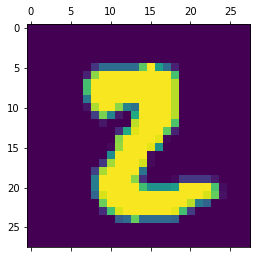

In [9]:
plt.matshow(X.iloc[idx,:].values.reshape(28,28)), y[idx]

### Split train_test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<AxesSubplot:>

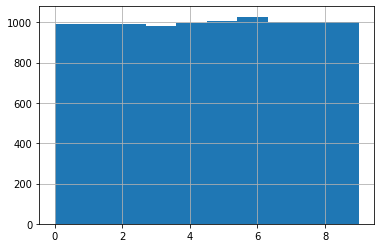

In [11]:
y_train.hist()

<AxesSubplot:>

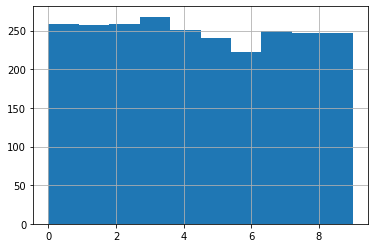

In [12]:
y_test.hist()

## Simple neural network in Keras

In [13]:
# Sequential create a stack of layers
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='softmax')
])

2022-02-03 21:13:39.588861: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-02-03 21:13:39.588885: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-02-03 21:13:39.588904: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ivan-ThinkPad-T590): /proc/driver/nvidia/version does not exist
2022-02-03 21:13:39.589203: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [15]:
#784 -> 10 neurons
#784*10 - weights
#10 - biases

784*10 + 10

7850

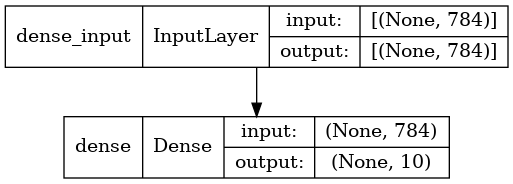

In [16]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [17]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Does the training
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
313/313 [==============================] - 1s 2ms/step - loss: 21.9691 - accuracy: 0.7182
Epoch 2/5
313/313 [==============================] - 1s 2ms/step - loss: 7.9056 - accuracy: 0.8560
Epoch 3/5
313/313 [==============================] - 1s 2ms/step - loss: 5.9062 - accuracy: 0.8768
Epoch 4/5
313/313 [==============================] - 1s 2ms/step - loss: 5.1945 - accuracy: 0.8814
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 4.5726 - accuracy: 0.8930


In [18]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 879us/step - loss: 8.0742 - accuracy: 0.8660


[8.074209213256836, 0.8659999966621399]

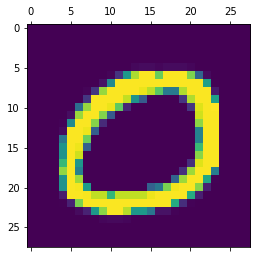

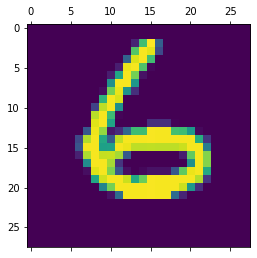

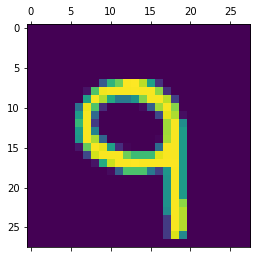

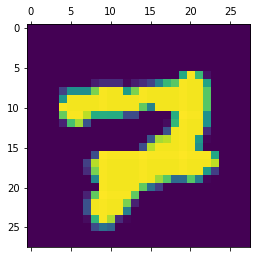

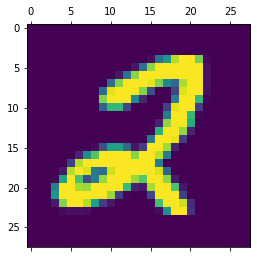

In [19]:
# Show the image
for i in range(5):
    #idx not i
    plt.matshow(X_test.iloc[i,:].values.reshape(28,28))

In [20]:
# Make the predictions
y_predicted = model.predict(X_test)

In [21]:
for i in range(5):
    print(y_predicted[i])
    print(np.argmax(y_predicted[i]))

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
6
[0.0000000e+00 0.0000000e+00 9.1831501e-35 0.0000000e+00 9.0688884e-14
 0.0000000e+00 0.0000000e+00 3.8448979e-25 0.0000000e+00 1.0000000e+00]
9
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
7
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
2


In [22]:
# converting y_predicted from whole numbers to integers
# so that we can use it in confusion matrix
# In short we are argmaxing the entire prediction
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5], y_test.iloc[:5].values

([0, 6, 9, 7, 2], array([0, 6, 9, 7, 2]))

In [23]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[238,   0,   3,   3,   0,   1,   5,   1,   7,   1],
       [  0, 249,   1,   3,   0,   0,   0,   1,   3,   0],
       [  1,   2, 231,   4,   1,   0,   3,   7,   9,   0],
       [  0,   1,   9, 247,   0,   3,   2,   2,   4,   0],
       [  0,   0,   7,   0, 213,   0,  12,   6,   7,   6],
       [  2,   3,   4,  22,   1, 165,   6,   2,  33,   3],
       [  3,   0,  11,   0,   0,   2, 203,   1,   2,   0],
       [  0,   1,   3,   4,   1,   0,   1, 229,   2,   9],
       [  0,   3,   2,  17,   0,   1,   1,   2, 221,   0],
       [  2,   0,   4,  11,  13,   2,   0,  31,  15, 169]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

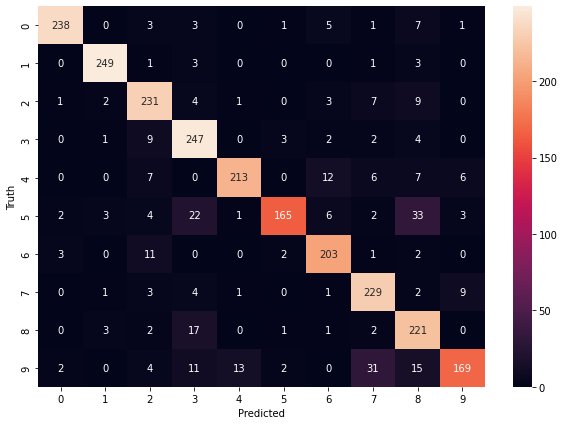

In [24]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## Adding a hidden layer

In [88]:
X_train.shape

(10000, 784)

In [80]:
# Sequential create a stack of layers
# Create a hidden layer with 100 neurons and relu activation
model = keras.Sequential([
    keras.layers.Dense(250, input_shape=(784,), activation='sigmoid'),
    keras.layers.Dense(10, activation='tanh'),
    keras.layers.Dense(250, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [81]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 250)               196250    
                                                                 
 dense_31 (Dense)            (None, 10)                2510      
                                                                 
 dense_32 (Dense)            (None, 250)               2750      
                                                                 
 dense_33 (Dense)            (None, 10)                2510      
                                                                 
Total params: 204,020
Trainable params: 204,020
Non-trainable params: 0
_________________________________________________________________


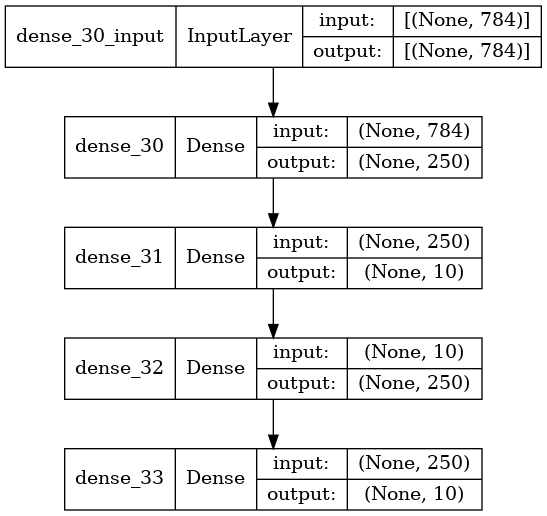

In [82]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [86]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Does the training
model.fit(X_train, y_train, epochs=40)

Epoch 1/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2484 - accuracy: 0.9211
Epoch 2/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2340 - accuracy: 0.9238
Epoch 3/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2393 - accuracy: 0.9228
Epoch 4/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2238 - accuracy: 0.9276
Epoch 5/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2345 - accuracy: 0.9227
Epoch 6/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2430 - accuracy: 0.9217
Epoch 7/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2418 - accuracy: 0.9204
Epoch 8/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2357 - accuracy: 0.9244
Epoch 9/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2200 - accuracy: 0.9300
Epoch 10/40
313/313 [==============================] - 1s 3ms/step - loss: 0.2162 - accuracy: 0.9301

In [87]:
model.evaluate(X_test, y_test)

79/79 [==============================] - 0s 2ms/step - loss: 0.2758 - accuracy: 0.9148


[0.27582359313964844, 0.9147999882698059]

In [42]:
y_predicted = model.predict(X_test)

In [43]:
for i in range(5):
    print(y_predicted[i])
    print(np.argmax(y_predicted[i]))

[9.6785319e-01 1.9578580e-04 9.4236142e-04 3.5176571e-03 3.3592712e-04
 2.1503396e-02 3.8592331e-04 2.3648764e-03 2.2725989e-03 6.2821066e-04]
0
[1.0284212e-03 2.5870019e-04 4.2622425e-03 1.5930019e-03 1.5317135e-02
 4.3087802e-03 9.7131079e-01 8.3148298e-05 1.2828958e-03 5.5497792e-04]
6
[6.6723867e-04 7.8524096e-04 4.9323477e-03 8.0620631e-04 1.7783618e-02
 4.3453404e-04 1.6598117e-04 3.9576611e-01 2.9413234e-03 5.7571739e-01]
9
[5.2987710e-03 3.3254498e-03 7.9749813e-03 2.4474119e-03 1.5226166e-03
 3.1939603e-03 5.4242538e-04 9.5318592e-01 5.4690028e-03 1.7039336e-02]
7
[1.4180172e-02 1.7365346e-03 9.6189541e-01 5.0027436e-03 6.7965518e-04
 1.2329203e-03 4.3696817e-03 2.0908834e-03 8.0526527e-03 7.5933681e-04]
2


In [44]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5], y_test.iloc[:5].values

([0, 6, 9, 7, 2], array([0, 6, 9, 7, 2]))

In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[245,   0,   3,   0,   1,   3,   5,   0,   2,   0],
       [  0, 251,   2,   1,   0,   0,   0,   0,   3,   0],
       [  1,   5, 228,   2,   3,   2,   6,   5,   6,   0],
       [  2,   1,  15, 215,   0,  18,   2,   3,  11,   1],
       [  5,   0,   4,   0, 213,   3,  10,   0,   3,  13],
       [  4,   2,   2,  11,   0, 190,   9,   3,  17,   3],
       [  4,   0,   4,   1,   1,   5, 206,   0,   1,   0],
       [  1,   7,   4,   1,   1,   0,   1, 220,   5,  10],
       [  2,   8,   3,  13,   0,  14,   4,   2, 198,   3],
       [  5,   1,   3,   1,   6,   2,   0,  15,  10, 204]], dtype=int32)>

Text(69.0, 0.5, 'Truth')

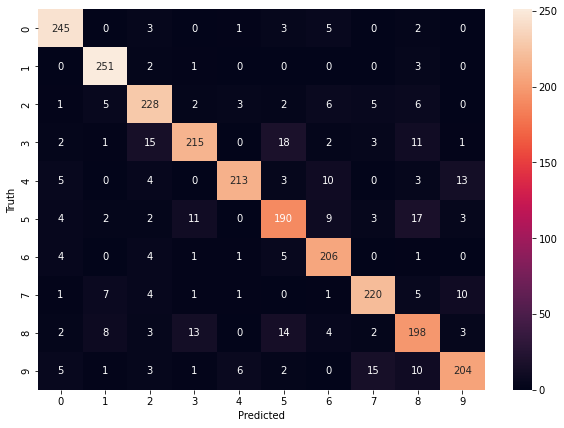

In [46]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

- Activation Functions — https://keras.io/api/layers/activations/
- Optimizers — https://keras.io/api/optimizers/
- Loss functions — https://keras.io/api/losses/

In [35]:
a

NameError: name 'a' is not defined

In [ ]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train[0]

plt.matshow(x_train[0])

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 1, 28*28)
x_train = x_train.astype('float32')
x_train /= 255

In [ ]:
from keras.utils import np_utils
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

In [ ]:
x_train = x_train.flatten()
x_test = x_test.flatten()

x_train

In [ ]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Optimizer will help in backproagation to reach better global optima
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
# Does the training
model.fit(x_train, y_train, epochs=5)

In [ ]:
model.evaluate(X_test, y_test)

In [ ]:
y_predicted = model.predict(X_test)

In [ ]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
cm